# Who produces the food we eat?
### Exploratory Data Analysis with Python (EDA)
### Priscilla Castro Blanco

#### Name and source of the selected dataset:
Who eats the food we grow, data from the UN
**Source:** https://www.kaggle.com/dorbicycle/world-foodfeed-production

___

In today's world, it might seem like we all have equal access to essential resources: internet, transportation, and food. However, accelerated population growth and the climate crisis are widening global inequalities, affecting access to these resources.

One of the most critical factors is the availability of food. Currently, agricultural production is divided between food for human and animal consumption. This database analyzes where these foods are produced and consumed, offering an opportunity to improve their distribution and efficiency.

In the face of future challenges, it is clear that the global food system is not prepared to sustain the growing demand projected for the next 25 years. Without significant changes, we risk a collapse in production, which could further deepen inequalities between nations and communities.

If you want to know more about this topic, watch the following video:


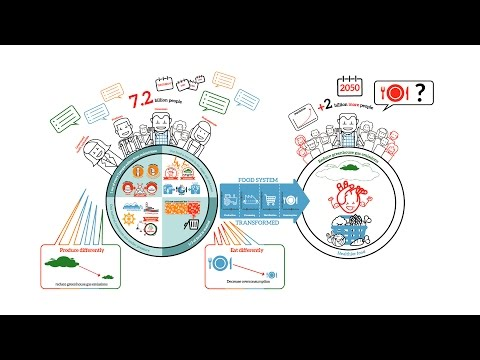

In [1]:
from IPython.display import YouTubeVideo

# YouTube Video ID
id_video = 'VcL3BQeteCc'

# Show the YouTube Video
YouTubeVideo(id_video)



The data in this database describe the type of food (for human or animal consumption) produced in around 245 countries
and territories.

In the columns we can find the data of the place where the food is produced (the area and country), as well as its specific code. This also shows the latitude and longitude, therefore, there is *geographical* data.

The other columns describe the type of food produced, and whether it is for animal or human consumption.
Finally, the data on food production from 1961 to 2013 are shown. In other words, they are *temporal* data.

### Questions to answer

The questions I want to answer when performing this data analysis are the following:

- Which country(ies) consumes the largest amount of food in the world?

- Which country(ies) produces the largest amount of food in the world?

- Is more food produced for human consumption, or for animal consumption?

### Regarding analysis and visualization:
I am interested in identifying whether there is a correlation between the countries that consume the most food and first world nations, as well as whether the countries that produce the most food tend to be third world.

I am also looking to determine whether production is more oriented towards human or animal consumption, and to represent this using a bar graph to analyze the possible causes behind this trend.

Finally, if the data allows it, I would like to study the evolution of food production and consumption over time, identifying key moments, such as production peaks linked to specific events.



## Data ingestion

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
# Data ingestion
food_data = pd.read_csv("FAO.csv", encoding="latin1")  

## Structural analysis
Once we are sure that we have ingested correctly, we begin with the structural analysis. To do this, we simply review the first 5 rows with all the columns for a first understanding of the data set.

In [4]:
food_data.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


With a general understanding of the data set, we perform another structural analysis to determine the information we have, the amount of data, and the memory usage.

In [5]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  21477 non-null  object 
 1   Area Code          21477 non-null  int64  
 2   Area               21477 non-null  object 
 3   Item Code          21477 non-null  int64  
 4   Item               21477 non-null  object 
 5   Element Code       21477 non-null  int64  
 6   Element            21477 non-null  object 
 7   Unit               21477 non-null  object 
 8   latitude           21477 non-null  float64
 9   longitude          21477 non-null  float64
 10  Y1961              17938 non-null  float64
 11  Y1962              17938 non-null  float64
 12  Y1963              17938 non-null  float64
 13  Y1964              17938 non-null  float64
 14  Y1965              17938 non-null  float64
 15  Y1966              17938 non-null  float64
 16  Y1967              179

This document contains complete data for each column, except for the year columns, which have 3,539 fewer entries. I have decided not to remove these columns, since, although they are not complete, the document details that countries were included that were created after data collection began, so it was impossible to collect this data before.

On the other hand, memory usage seems to be fine.

Finally, we look for null values, so we can identify where they are:

In [6]:
mascaraNulos = food_data.isna()
mascaraNulos.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Semantic analysis

First we do some basic statistics extraction on the data

In [7]:
food_data.describe()

,Area Code,Item Code,Element Code,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
count,21477.000000,21477.000000,21477.000000,21477.000000,21477.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,...,21128.000000,21128.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21477.000000,21477.000000
mean,125.449411,2694.211529,5211.687154,20.450613,15.794445,195.262069,200.782250,205.464600,209.925577,217.556751,...,486.690742,493.153256,496.319328,508.482104,522.844898,524.581996,535.492069,553.399242,560.569214,575.557480
std,72.868149,148.973406,146.820079,24.628336,66.012104,1864.124336,1884.265591,1861.174739,1862.000116,2014.934333,...,5001.782008,5100.057036,5134.819373,5298.939807,5496.697513,5545.939303,5721.089425,5883.071604,6047.950804,6218.379479
min,1.000000,2511.000000,5142.000000,-40.900000,-172.100000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-169.000000,-246.000000
25%,63.000000,2561.000000,5142.000000,6.430000,-11.780000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,2640.000000,5142.000000,20.590000,19.150000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,8.000000
75%,188.000000,2782.000000,5142.000000,41.150000,46.870000,21.000000,22.000000,23.000000,24.000000,25.000000,...,75.000000,77.000000,78.000000,80.000000,82.000000,83.000000,83.000000,86.000000,88.000000,90.000000
max,276.000000,2961.000000,5521.000000,64.960000,179.410000,112227.000000,109130.000000,106356.000000,104234.000000,119378.000000,...,360767.000000,373694.000000,388100.000000,402975.000000,425537.000000,434724.000000,451838.000000,462696.000000,479028.000000,489299.000000


Due to the amount in the "Area Code", it seems that there are 276 different areas where food is produced.

Returning to the semantic analysis, and to the questions proposed at the beginning, there is one question that cannot be answered:
- Which country(ies) consumes the largest amount of food in the world?

This is because this information is not specified in the data set, therefore, it is not possible to answer it at this time.
The two questions that remain to be answered are:

- Is more food produced for human consumption, or for animal consumption?

- Which country(ies) produces the largest amount of food in the world?

___

Let's answer the first question below
### Is more food produced for human consumption, or for animal consumption?

In [9]:
# Filter rows where 'Element' is 'Food'
food_items = food_data[food_data['Element'] == 'Food']

# Filter rows where 'Element' is 'Feed'
feed_items = food_data[food_data['Element'] == 'Feed']

# Identify the columns of years
columns_years = [col for col in food_data.columns if col.startswith('Y')]

# Sum the productions for 'Food'
food_production = food_items[columns_years].sum().sum()

# Sum the productions for 'Feed'
feed_production = feed_items[columns_years].sum().sum()

print(f"Total of food: {food_production}")
print(f"Total of feed: {feed_production}")

# Compare the productions
if food_production > feed_production:
    print("There is more food produced.")
elif feed_production > food_production:
    print("There is more feed produced.")
else:
    print("The production of food and feed is the same.")


Total of food: 291375363.0
Total of feed: 87348711.0
There is more food produced.


Next, we will take the values ​​of the elements (Feed and Food), that is, the production of food for humans and animals from the year 2000 onwards, to graph and observe the difference in the production of both, in addition to seeing their change over time.

In [10]:
# We will group all elements by year. For that, we identify the columns where the year is located.
columns_year = [col for col in food_data.columns if col.startswith('Y2')]

# We create the pivot table with Element (Food and Feed as index), the values of the year columns, and the sum of all those values.
pivote1 = pd.pivot_table(food_data, index="Element", values=columns_year, aggfunc="sum")
pivote1

,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
Element,,,,,,,,,,,,,,
Feed,2105448.0,2145315.0,2130442.0,2144306.0,2265261.0,2231603.0,2216267.0,2253747.0,2366119.0,2279482.0,2300597.0,2455964.0,2423161,2608511
Food,7439587.0,7546602.0,7703775.0,7842758.0,8017541.0,8187739.0,8391566.0,8614041.0,8808645.0,8932409.0,9144475.0,9371838.0,9616184,9752737


We created the graph that shows this information

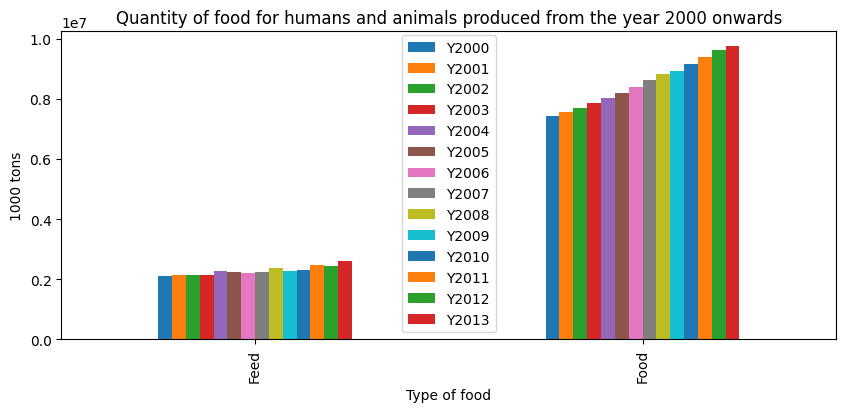

In [11]:
ax = pivote1.plot.bar(figsize=(10,4), title = "Quantity of food for humans and animals produced from the year 2000 onwards")
ax.set_xlabel("Type of food")
ax.set_ylabel("1000 tons")
plt.show()

#### Conclusion 1:

More food is produced for humans, and for data after the year 2000, it can be seen that the amount of food produced for humans is increasing (until 2013), unlike animal food, which remains relatively constant.

___

We continue with the next question

### Which are the countries with the highest production of food for humans (food)?

In [12]:
# Filter rows where the 'Element' is 'Food'
food_items = food_data[food_data['Element'] == 'Food']

# Identify the year columns
columns_years = [col for col in food_data.columns if col.startswith('Y')]

# Sum the productions for each country
produccion_por_pais_food = food_items.groupby('Area')[columns_years].sum()

# Calculate the total production by summing across the years
produccion_por_pais_food ['Total'] = produccion_por_pais_food.sum(axis=1)

# Sort by total production in descending order
produccion_por_pais_ordenado_food = produccion_por_pais_food.sort_values(by='Total', ascending=False)

# Show the top 10 countries
top_paises = produccion_por_pais_ordenado_food.head(10)
print(top_paises)


                             Y1961     Y1962     Y1963     Y1964     Y1965  \
Area                                                                         
China, mainland           421752.0  435337.0  424916.0  420137.0  474811.0   
India                     294341.0  302938.0  299645.0  309298.0  311222.0   
United States of America  324934.0  327778.0  329060.0  337165.0  340652.0   
Brazil                     71616.0   76420.0   79684.0   84811.0   88252.0   
Germany                   118159.0  122048.0  125453.0  127003.0  128292.0   
Japan                      97046.0  102022.0  107065.0  108955.0  111266.0   
Indonesia                  60962.0   63652.0   64415.0   69404.0   69215.0   
Italy                      83800.0   83298.0   88683.0   90109.0   92251.0   
France                     94396.0   97110.0   98196.0   99389.0   99252.0   
Nigeria                    40490.0   42072.0   43072.0   43977.0   44357.0   

                             Y1966     Y1967     Y1968     Y196

For Food production, the countries that produce the largest amount are China, India and the United States.

Text(0, 0.5, '1000 tons')

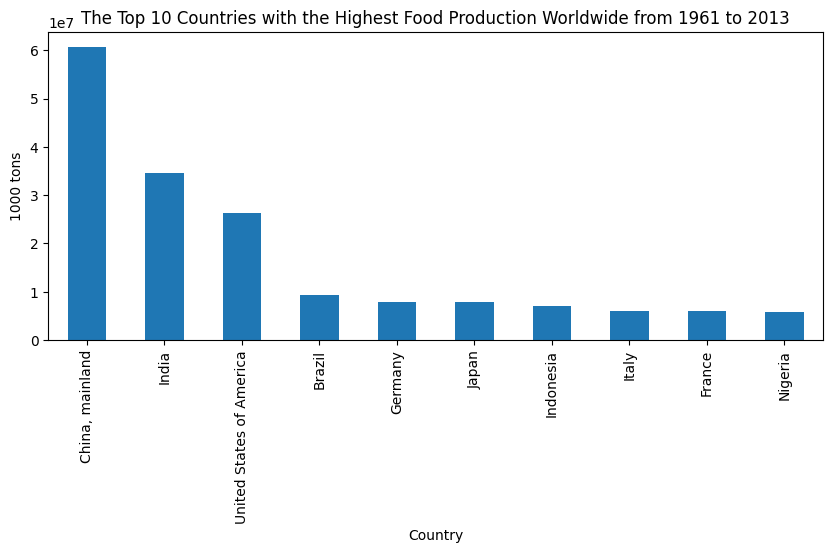

In [13]:
ax = produccion_por_pais_ordenado_food['Total'].head(10).plot.bar(figsize=(10,4), title = "The Top 10 Countries with the Highest Food Production Worldwide from 1961 to 2013")
ax.set_xlabel("Country")
ax.set_ylabel("1000 tons")


#### Which countries produce the largest amount of animal feed?

In [14]:
# Filter rows where the 'Element' is 'Feed'
food_items = food_data[food_data['Element'] == 'Feed']

# Identify the year columns
columns_years = [col for col in food_data.columns if col.startswith('Y')]

# Sum the productions for each country
produccion_por_pais_feed = food_items.groupby('Area')[columns_years].sum()

# Calculate the total production by summing across the years
produccion_por_pais_feed['Total'] = produccion_por_pais_feed.sum(axis=1)

# Sort by total production in descending order
produccion_por_pais_ordenado_feed = produccion_por_pais_feed.sort_values(by='Total', ascending=False)

# Show the top 10 countries
top_paises = produccion_por_pais_ordenado_feed.head(10)
print(top_paises)


                             Y1961     Y1962     Y1963     Y1964     Y1965  \
Area                                                                         
China, mainland            55527.0   64160.0   76879.0   86231.0   90948.0   
United States of America  234413.0  228541.0  223570.0  218512.0  248636.0   
Brazil                     54885.0   66116.0   72494.0   69887.0   63808.0   
Germany                    94680.0  105951.0  106370.0  108207.0  109418.0   
Poland                     76684.0   64392.0   74806.0   76820.0   72139.0   
France                     43989.0   47519.0   50519.0   48669.0   50269.0   
Russian Federation             0.0       0.0       0.0       0.0       0.0   
Canada                     22888.0   28153.0   29685.0   28624.0   30452.0   
Spain                      11482.0   12581.0   14846.0   15214.0   16561.0   
India                      15224.0   15864.0   15510.0   15266.0   16154.0   

                             Y1966     Y1967     Y1968     Y196

We carry out the same procedure as above, in which we graph the distribution of food production among the top 10 countries with the highest production of animal feed.

Text(0, 0.5, '1000 tons')

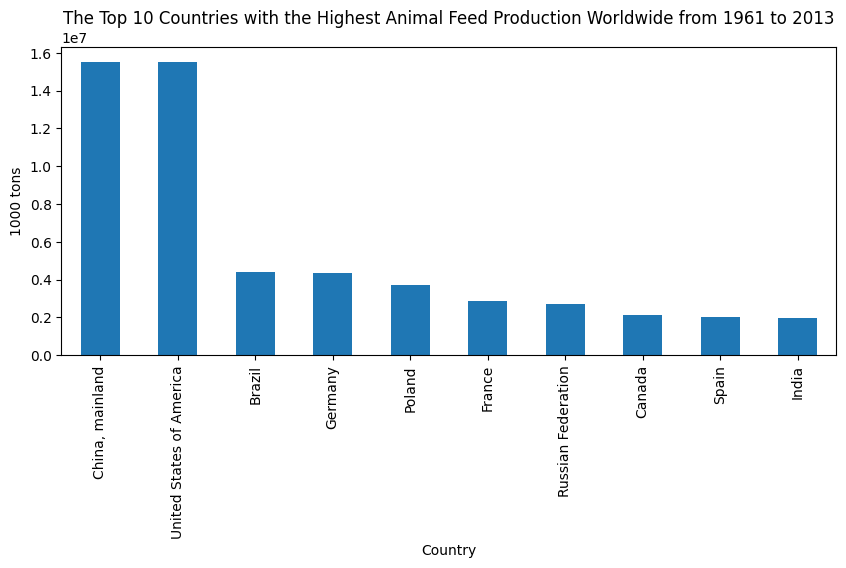

In [15]:
ax = produccion_por_pais_ordenado_feed['Total'].head(10).plot.bar(figsize=(10,4), title = "The Top 10 Countries with the Highest Animal Feed Production Worldwide from 1961 to 2013")
ax.set_xlabel("Country")
ax.set_ylabel("1000 tons")

The countries leading the list of animal food producers are China, the United States and Brazil.
It is interesting to note that two of the three countries are the same ones that produce the largest amount of food for humans.

## Conclusions

1. The data show that more food is produced for human consumption
2. In the case of human food production, the 3 countries that lead the list are China, India and the United States.
3. And for animal food production, the countries that produce the most animal food are China, the United States and Brazil.